In [1]:
%load_ext autoreload
%autoreload 2
import itertools
import math
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
import py_rdl
import RA

In [2]:
data = pd.read_csv("data/cyclic_peptide_2.csv")
phi_psi = pd.read_csv("data/phi-psi.csv")

In [4]:
tttt = []
tttc = []
ttcc = []
tctc = []
tccc = []
cccc = []
for idx, item in enumerate(data[["P1","P2","P3","P4"]].values):
    if item.tolist()==["T","T","T","T"]:
        tttt.append(idx)
    elif item.tolist() in [["T","T","T","C"],["T","T","C","T"],["T","C","T","T"],["C","T","T","T"]]:
        tttc.append(idx)
    elif item.tolist() in [["T","T","C","C"],["T","C","C","T"],["C","C","T","T"]]:
        ttcc.append(idx)
    elif item.tolist() in [["T","C","T","C"],["C","T","C","T"]]:
        tctc.append(idx)
    elif item.tolist() in [["C","C","C","T"],["C","C","T","C"],["C","T","C","C"],["T","C","C","C"]]:
        tccc.append(idx)
    else:
        cccc.append(idx)

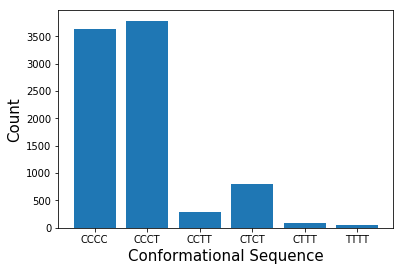

In [6]:
seq = ["CCCC","CCCT","CCTT","CTCT","CTTT","TTTT"]
count = [len(cccc),len(tccc),len(ttcc), len(tctc), len(tttc), len(tttt)]
plt.bar(seq,count)
plt.xlabel("Conformational Sequence",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/seq_count.pdf",dpi=150,bbox_inches="tight")
plt.show()

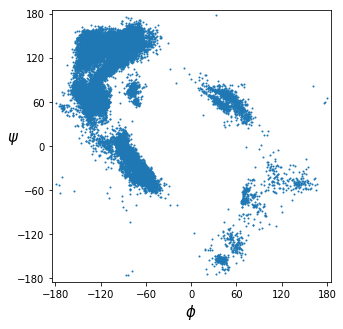

In [7]:
phi_psi_transform = phi_psi.values.reshape(8661*4,2)
aminoacid = data[["AA1","AA2","AA3","AA4"]].values.reshape(8661*4)
keep_phi_psi = []
for i, item in enumerate(aminoacid):
    if item!="G":
        keep_phi_psi.append(phi_psi_transform[i])  # exclude Gly phi-psi angle
phi_psi_frame = pd.DataFrame(keep_phi_psi)
plt.figure(figsize=(5,5))
plt.scatter(phi_psi_frame.iloc[:,1],phi_psi_frame.iloc[:,0],s=1)
plt.xlim(-185,185)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.ylim(-185,185)
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\phi$",size=15)
plt.ylabel(r"$\psi$",size=15,rotation=0)
plt.savefig("Fig/CTP/ctps.pdf",bbox_inches="tight",dpi=150)
plt.show()

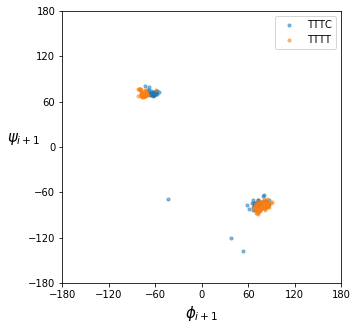

In [9]:
# Phi-Psi (Gamma Turns)
tttc_phi_psi = pd.read_csv("data/tttc_phi_psi.csv")
tttt_phi_psi = pd.read_csv("data/tttt_phi_psi.csv")
plt.figure(figsize=(5,5))
plt.scatter(tttc_phi_psi.iloc[:,0],tttc_phi_psi.iloc[:,1],label="TTTC",
            s=10,alpha=0.5)
plt.scatter(tttt_phi_psi.iloc[:,0],tttt_phi_psi.iloc[:,1],label="TTTT",
            s=10,alpha=0.5)
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\phi_{i+1}$",size=15)
plt.ylabel(r"$\psi_{i+1}$",size=15, rotation=0)
plt.legend()
plt.savefig("Fig/CTP/gamma-turns-phi-psi.pdf",dpi=150, bbox_inches="tight")
plt.show()

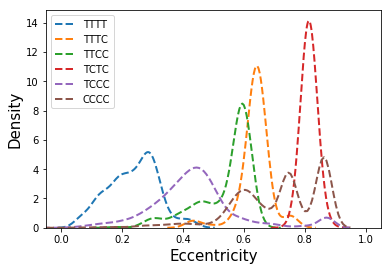

In [8]:
sns.kdeplot(data["Eccentricity"].iloc[tttt],bw=0.025,label="TTTT",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tttc],bw=0.025,label="TTTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[ttcc],bw=0.025,label="TTCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tctc],bw=0.025,label="TCTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tccc],bw=0.025,label="TCCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[cccc],bw=0.025,label="CCCC",ls="--",lw=2)
plt.xlim(-0.05,1.05)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.savefig("Fig/CTP/eccentricity.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [11]:
# Pseudorotation
cccc_frame = data.iloc[cccc,:]
ccct_frame = data.iloc[tccc,:]
tctc_frame = data.iloc[tctc,:]
ttcc_frame = data.iloc[ttcc,:]
tttc_frame = data.iloc[tttc,:]
tttt_frame = data.iloc[tttt,:]

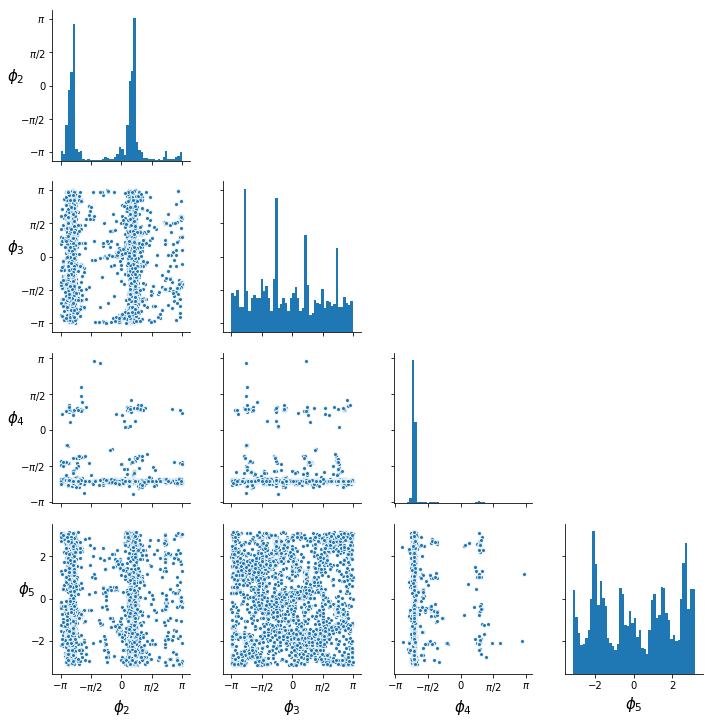

In [12]:
g0 = sns.pairplot(cccc_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50), plot_kws=dict(s=15))
for i, j in zip(*np.triu_indices_from(g0.axes, 1)):
    g0.axes[i, j].set_visible(False)

for i in range(0,3):
    g0.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g0.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,3):
    g0.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g0.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

g0.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g0.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g0.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g0.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g0.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g0.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g0.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g0.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/cccc_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

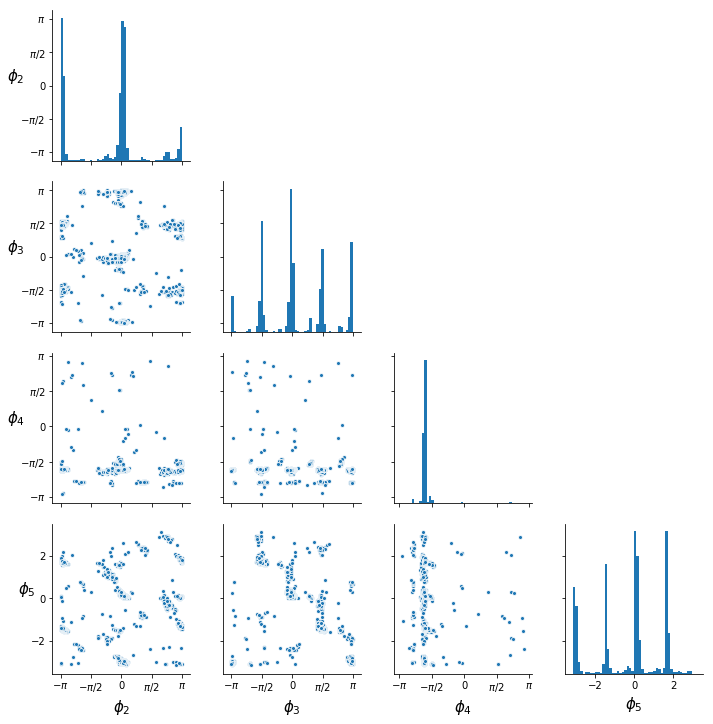

In [13]:
g1 = sns.pairplot(ccct_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50), plot_kws=dict(s=15))
for i, j in zip(*np.triu_indices_from(g1.axes, 1)):
    g1.axes[i, j].set_visible(False)

for i in range(0,3):
    g1.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g1.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,3):
    g1.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g1.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

g1.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g1.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g1.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g1.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g1.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g1.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g1.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g1.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/ccct_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

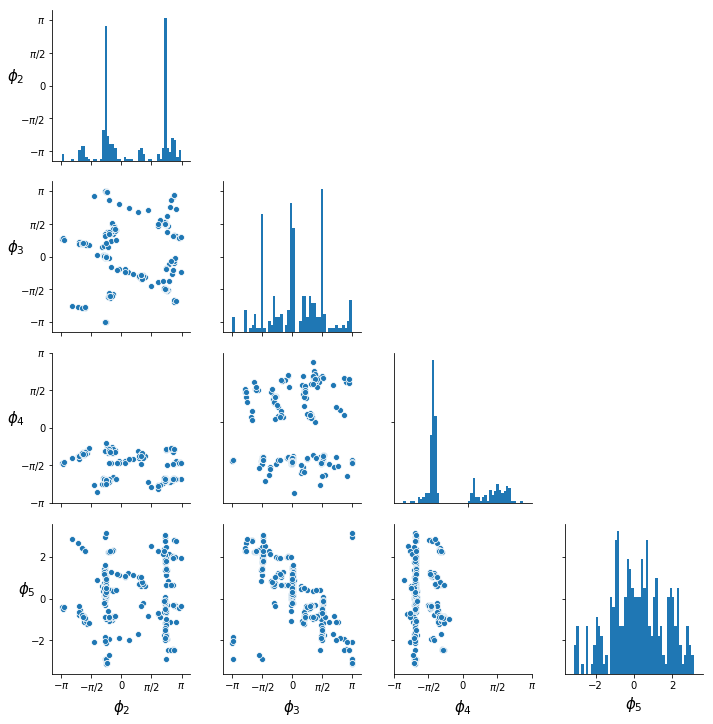

In [14]:
g2 = sns.pairplot(ttcc_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g2.axes, 1)):
    g2.axes[i, j].set_visible(False)

for i in range(0,3):
    g2.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g2.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,3):
    g2.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g2.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
g2.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g2.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g2.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g2.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g2.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g2.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g2.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g2.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/ttcc_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

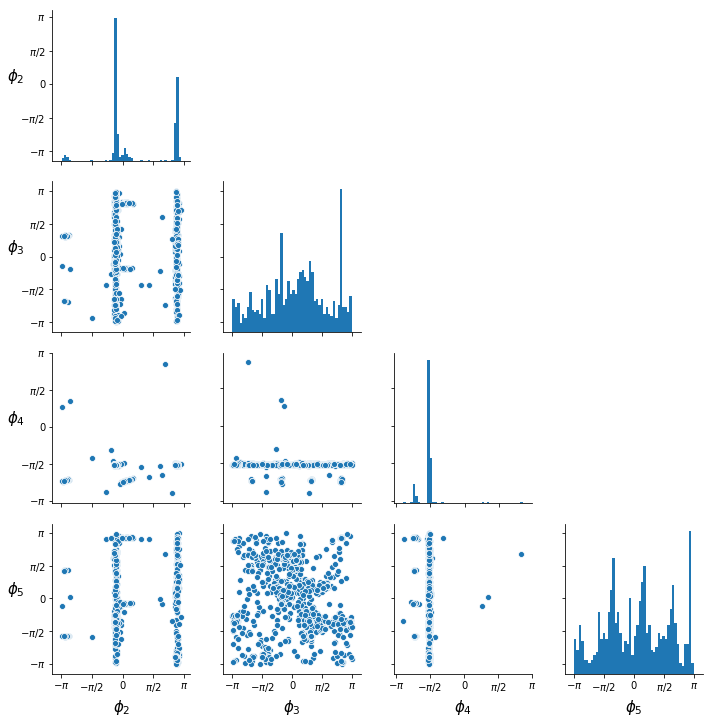

In [15]:
g3 = sns.pairplot(tctc_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g3.axes, 1)):
    g3.axes[i, j].set_visible(False)

for i in range(0,4):
    g3.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g3.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,4):
    g3.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g3.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
g3.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g3.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g3.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g3.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g3.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g3.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g3.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g3.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tctc_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

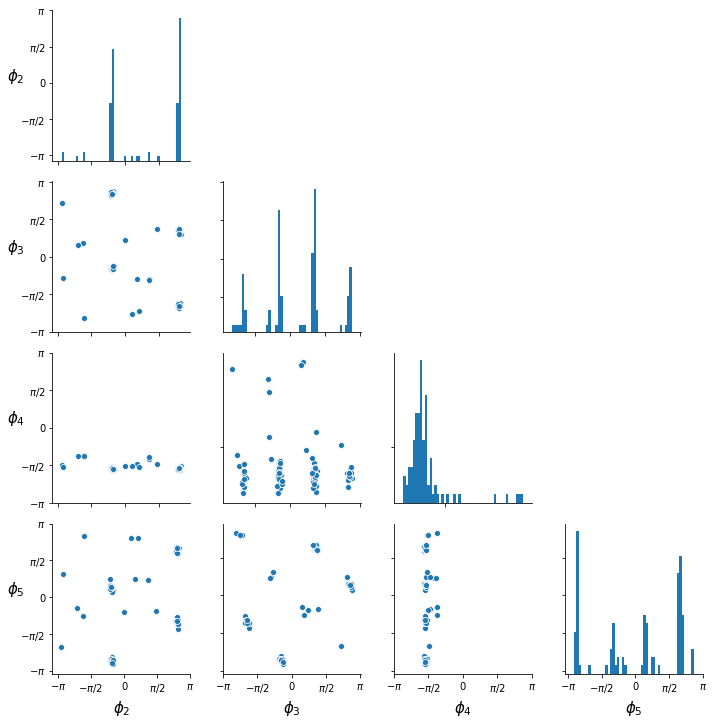

In [16]:
g4 = sns.pairplot(tttc_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g4.axes, 1)):
    g4.axes[i, j].set_visible(False)

for i in range(0,4):
    g4.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g4.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,4):
    g4.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g4.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
g4.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g4.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g4.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g4.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g4.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g4.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g4.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g4.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tttc_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

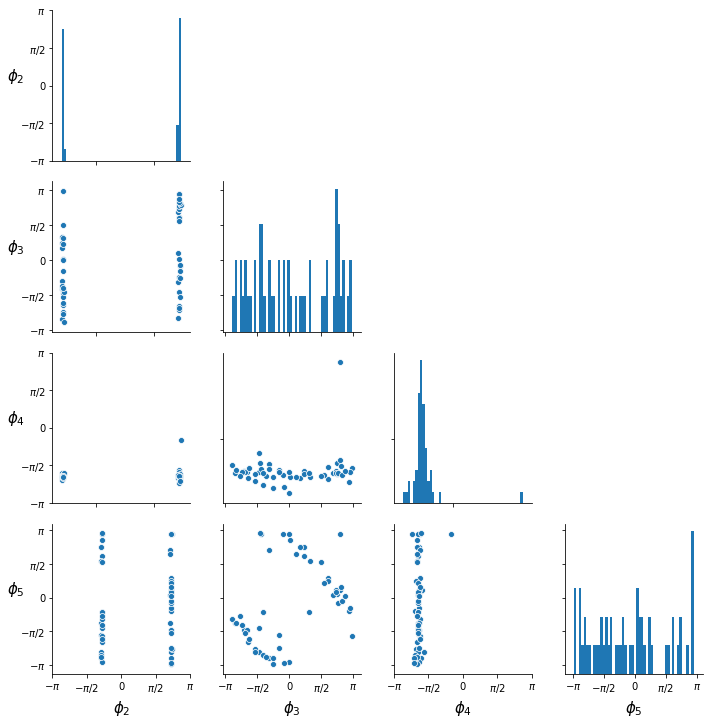

In [17]:
g5 = sns.pairplot(tttt_frame[["phi2","phi3","phi4","phi5"]],diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g5.axes, 1)):
    g5.axes[i, j].set_visible(False)

for i in range(0,4):
    g5.axes[i, 0].set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g5.axes[i, 0].set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])

for i in range(0,4):
    g5.axes[3, i].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    g5.axes[3, i].set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
g5.axes[0,0].set_ylabel(r"$\phi_{2}$", rotation=0, size=15)
g5.axes[1,0].set_ylabel(r"$\phi_{3}$", rotation=0, size=15)
g5.axes[2,0].set_ylabel(r"$\phi_{4}$", rotation=0, size=15)
g5.axes[3,0].set_ylabel(r"$\phi_{5}$", rotation=0, size=15)
g5.axes[3,0].set_xlabel(r"$\phi_{2}$", rotation=0, size=15)
g5.axes[3,1].set_xlabel(r"$\phi_{3}$", rotation=0, size=15)
g5.axes[3,2].set_xlabel(r"$\phi_{4}$", rotation=0, size=15)
g5.axes[3,3].set_xlabel(r"$\phi_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tttt_pseudorotation.pdf", dpi=150, bbox_inches="tight")
plt.show()

# Substituents Orientation

In [18]:
cccc_alpha = cccc_frame[["a1","a2","a3","a4"]]
tccc_alpha = ccct_frame[["a1","a2","a3","a4"]]
tctc_alpha = tctc_frame[["a1","a2","a3","a4"]]
ttcc_alpha = ttcc_frame[["a1","a2","a3","a4"]]
tttc_alpha = tttc_frame[["a1","a2","a3","a4"]]
tttt_alpha = tttt_frame[["a1","a2","a3","a4"]]

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


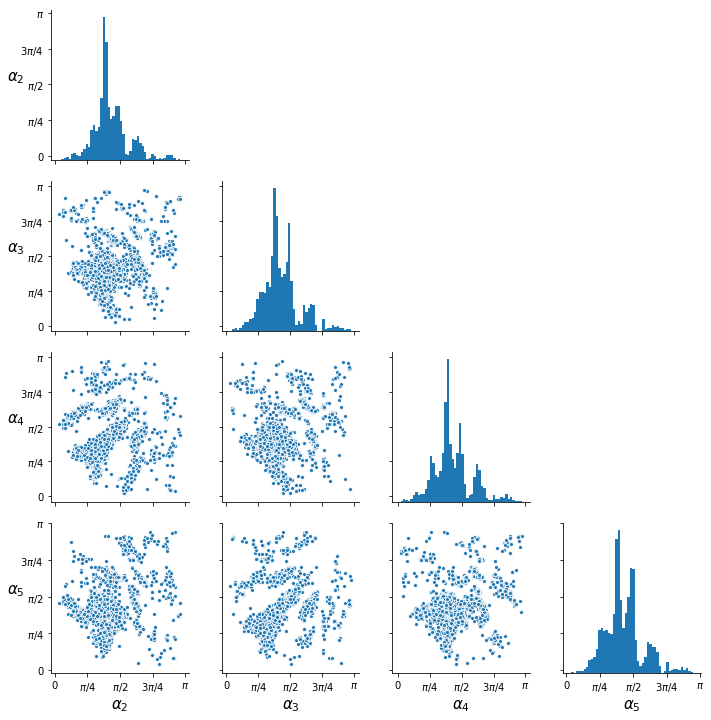

In [19]:
g0 = sns.pairplot(cccc_alpha,diag_kws=dict(bins=50), plot_kws=dict(s=15))
for i, j in zip(*np.triu_indices_from(g0.axes, 1)):
    g0.axes[i, j].set_visible(False)

for i in range(0,4):
    g0.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g0.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g0.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g0.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g0.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g0.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g0.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g0.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g0.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g0.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g0.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g0.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/cccc_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()

    

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


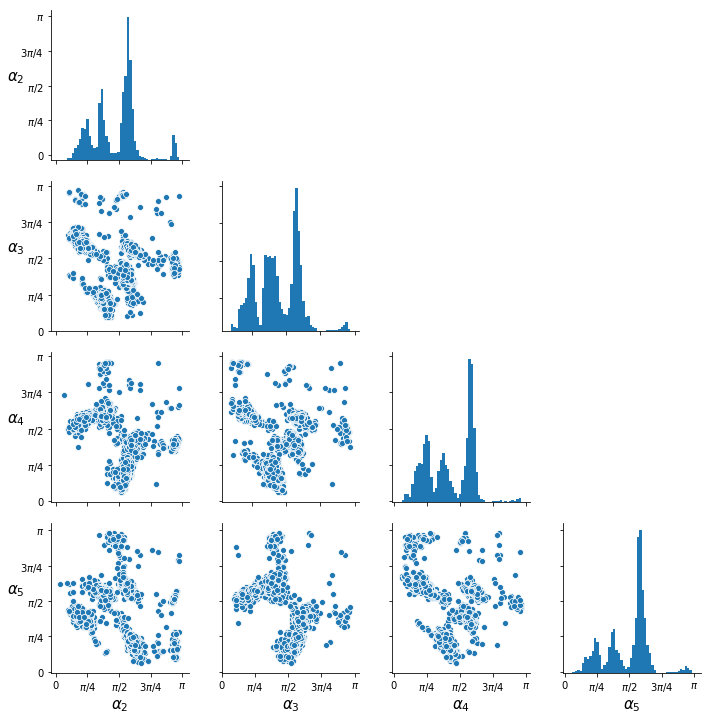

In [20]:
g1 = sns.pairplot(tccc_alpha,diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g1.axes, 1)):
    g1.axes[i, j].set_visible(False)

for i in range(0,4):
    g1.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g1.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g1.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g1.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g1.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g1.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g1.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g1.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g1.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g1.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g1.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g1.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tccc_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()

    

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


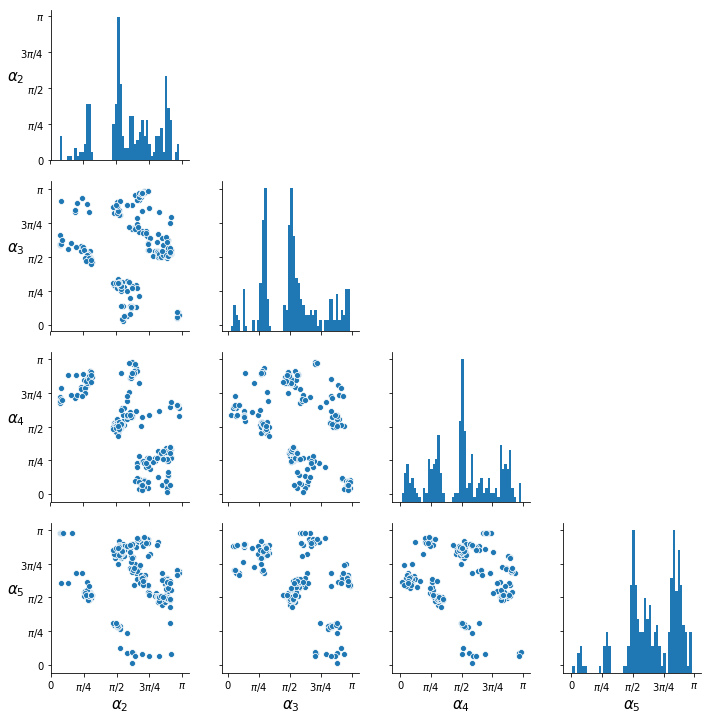

In [21]:
g2 = sns.pairplot(ttcc_alpha,diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g2.axes, 1)):
    g2.axes[i, j].set_visible(False)

for i in range(0,4):
    g2.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g2.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g2.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g2.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g2.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g2.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g2.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g2.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g2.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g2.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g2.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g2.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/ttcc_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()    
    

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


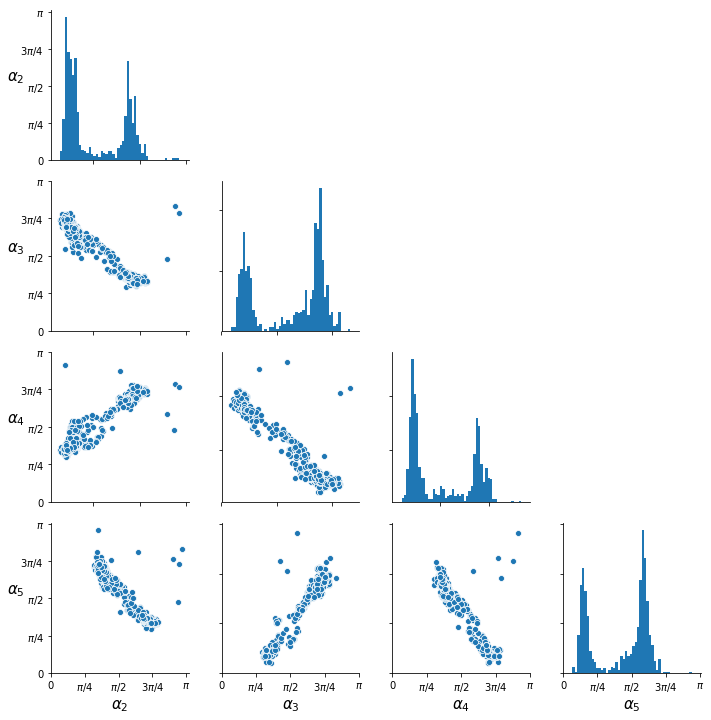

In [22]:
g3 = sns.pairplot(tctc_alpha,diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g3.axes, 1)):
    g3.axes[i, j].set_visible(False)

for i in range(0,4):
    g3.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g3.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g3.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g3.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g3.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g3.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g3.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g3.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g3.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g3.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g3.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g3.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tctc_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()

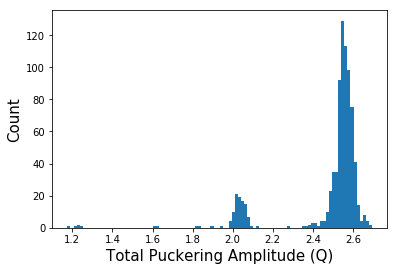

In [52]:
# Puckering difference between the "outliers" and the main group
plt.hist((tctc_frame[["q2","q3","q4","q5","q6"]].apply(np.square)).sum(axis=1).apply(np.sqrt),bins=100)
plt.xlabel("Total Puckering Amplitude (Q)",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/tctc_Q.pdf",dpi=150, bbox_inches="tight")
plt.show()

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


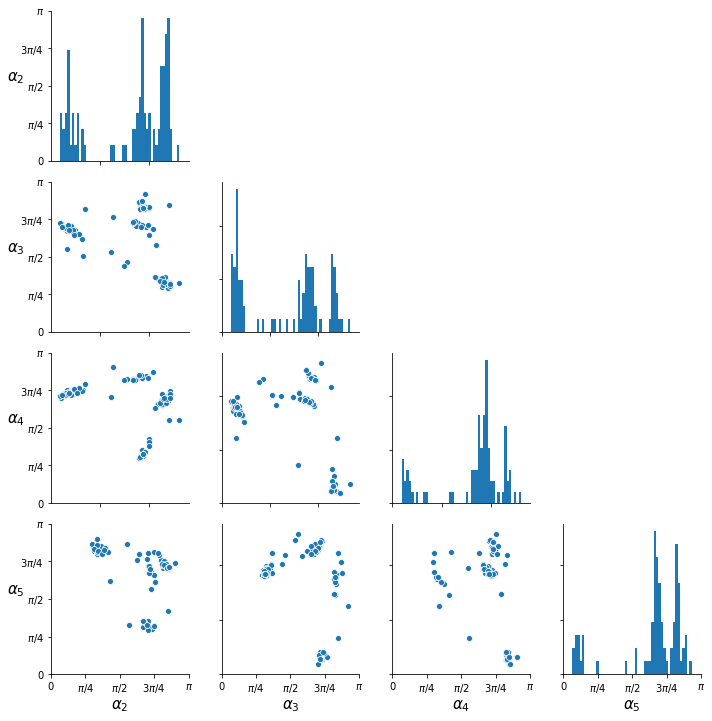

In [123]:
g4 = sns.pairplot(tttc_alpha,diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g4.axes, 1)):
    g4.axes[i, j].set_visible(False)

for i in range(0,4):
    g4.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g4.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g4.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g4.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g4.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g4.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g4.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g4.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g4.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g4.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g4.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g4.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tttc_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()    
    

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


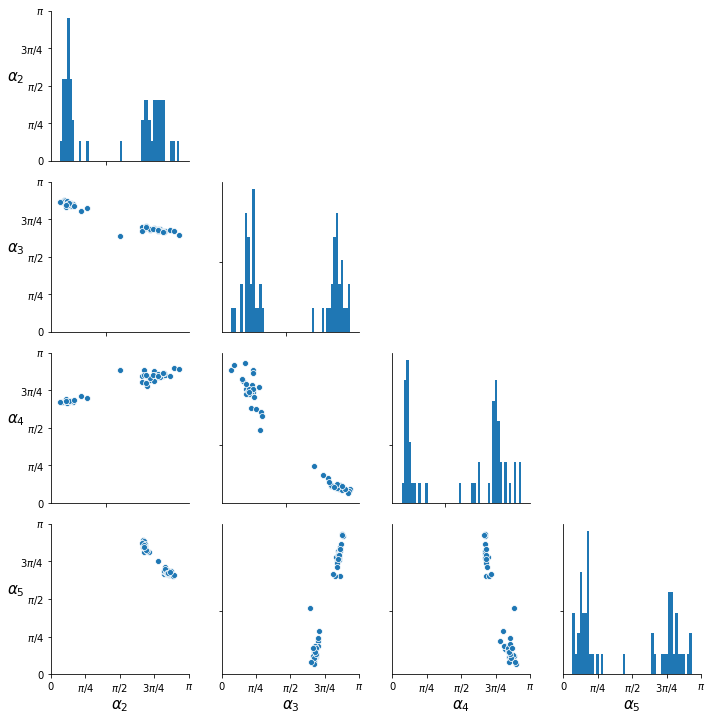

In [23]:
g5 = sns.pairplot(tttt_alpha,diag_kws=dict(bins=50))
for i, j in zip(*np.triu_indices_from(g5.axes, 1)):
    g5.axes[i, j].set_visible(False)

for i in range(0,4):
    g5.axes[i, 0].set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g5.axes[i, 0].set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

for i in range(0,4):
    g5.axes[3, i].set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
    g5.axes[3, i].set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])

g5.axes[0,0].set_ylabel(r"$\alpha_{2}$", rotation=0, size=15)
g5.axes[1,0].set_ylabel(r"$\alpha_{3}$", rotation=0, size=15)
g5.axes[2,0].set_ylabel(r"$\alpha_{4}$", rotation=0, size=15)
g5.axes[3,0].set_ylabel(r"$\alpha_{5}$", rotation=0, size=15)
g5.axes[3,0].set_xlabel(r"$\alpha_{2}$", rotation=0, size=15)
g5.axes[3,1].set_xlabel(r"$\alpha_{3}$", rotation=0, size=15)
g5.axes[3,2].set_xlabel(r"$\alpha_{4}$", rotation=0, size=15)
g5.axes[3,3].set_xlabel(r"$\alpha_{5}$", rotation=0, size=15)
plt.savefig("Fig/CTP/tttt_alpha.pdf",bbox_inches="tight", dpi=150)    
plt.show()    
    

# Side Chain Chi-1 Distribution

In [151]:
# Side Chain distribution
chi1 = pd.read_csv("data/chi1.csv")

In [152]:
AA = data[["AA1","AA2","AA3","AA4"]].values.reshape(-1)
chi1_array = chi1.values.reshape(-1)
aa_chi = pd.DataFrame({"AA":AA,"Chi1":chi1_array})

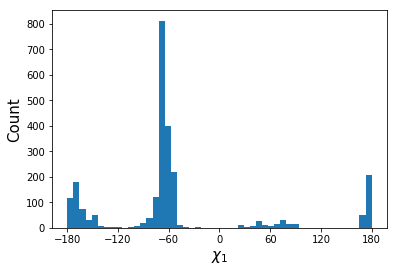

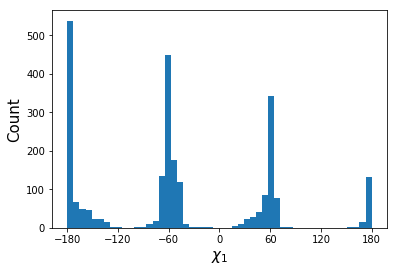

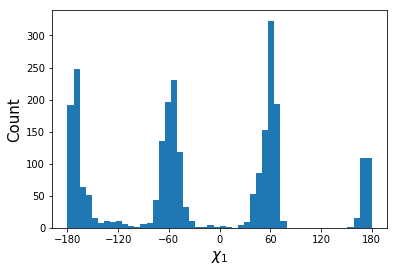

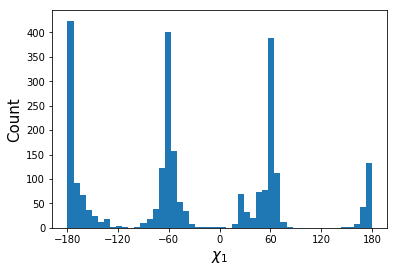

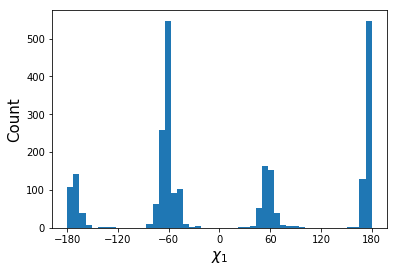

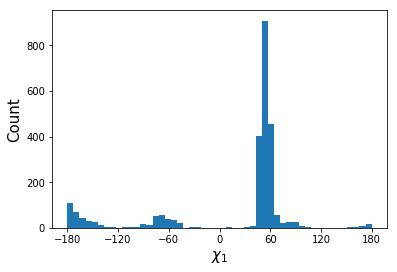

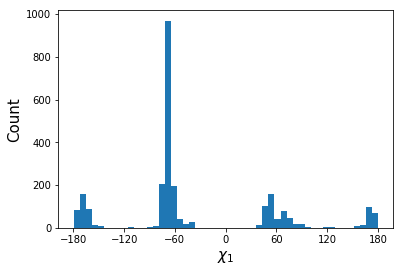

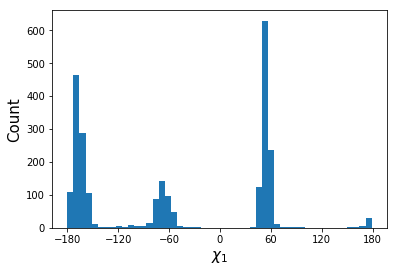

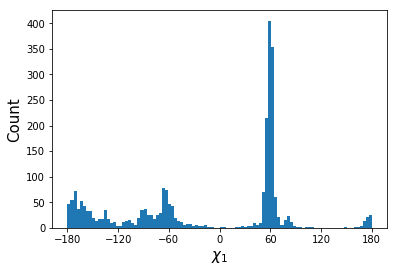

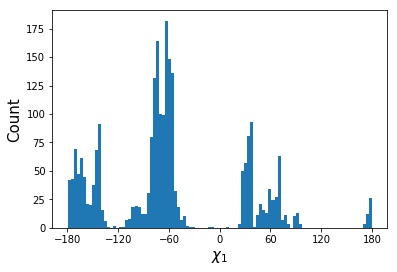

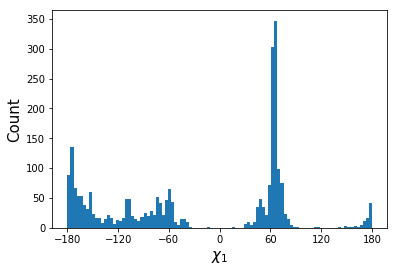

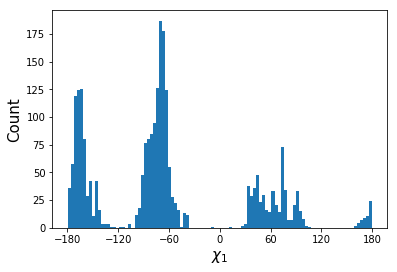

In [153]:
plt.hist(aa_chi[aa_chi["AA"]=="L"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/L_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="F"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/F_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="W"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/W_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="Y"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/Y_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="V"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/V_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="S"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/S_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="T"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/T_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="C"]["Chi1"],bins=50)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/C_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="H"]["Chi1"],bins=100)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/H_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="K"]["Chi1"],bins=100)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/K_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="D"]["Chi1"],bins=100)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/D_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

plt.hist(aa_chi[aa_chi["AA"]=="E"]["Chi1"],bins=100)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Fig/CTP/E_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

/home/lucian/anaconda3/envs/Chem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


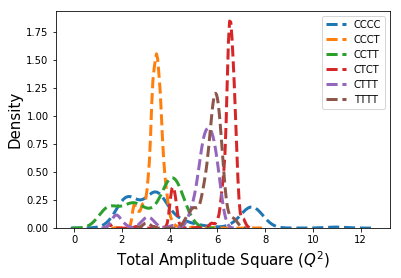

In [182]:
sns.kdeplot(cccc_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="CCCC",ls="--",lw=3)
sns.kdeplot(ccct_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="CCCT",ls="--",lw=3)
sns.kdeplot(ttcc_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="CCTT",ls="--",lw=3)
sns.kdeplot(tctc_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="CTCT",ls="--",lw=3)
sns.kdeplot(tttc_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="CTTT",ls="--",lw=3)
sns.kdeplot(tttt_frame[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1),label="TTTT",ls="--",lw=3)
plt.xlabel(r"Total Amplitude Square ($Q^{2}$)",size=15)
plt.ylabel("Density",size=15)
plt.show()

In [296]:
# Relationship between puckering parameter and alpha angle
tctc_ = tctc_frame[["q2","q3","q4","q5","q6","phi2","phi3","phi4","phi5","a1","a2","a3","a4"]].dropna()
cccc1 = cccc_[cccc_[["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1).apply(np.sqrt)>1.9]

In [297]:
c1a,c1b = cccc1["q2"].values*np.cos(cccc1["phi2"]+2*2*np.pi/12), cccc1["q2"].values*np.sin(cccc1["phi2"]+2*2*np.pi/12)
c2a,c2b = cccc1["q3"].values*np.cos(cccc1["phi3"]+3*2*np.pi/12), cccc1["q3"].values*np.sin(cccc1["phi3"]+3*2*np.pi/12)
c3a,c3b = cccc1["q4"].values*np.cos(cccc1["phi4"]+4*2*np.pi/12), cccc1["q4"].values*np.sin(cccc1["phi4"]+4*2*np.pi/12)
c4a,c4b = cccc1["q5"].values*np.cos(cccc1["phi5"]+5*2*np.pi/12), cccc1["q5"].values*np.sin(cccc1["phi5"]+5*2*np.pi/12)

c1c,c1d = (cccc1["q2"].values**2)*np.cos(2*cccc1["phi2"]+2*2*2*np.pi/12), (cccc1["q2"].values**2)*np.sin(2*cccc1["phi2"]+2*2*2*np.pi/12)
c2c,c2d = (cccc1["q3"].values**2)*np.cos(2*cccc1["phi3"]+2*3*2*np.pi/12), (cccc1["q3"].values**2)*np.sin(2*cccc1["phi3"]+2*3*2*np.pi/12)
c3c,c3d = (cccc1["q4"].values**2)*np.cos(2*cccc1["phi4"]+2*4*2*np.pi/12), (cccc1["q4"].values**2)*np.sin(2*cccc1["phi4"]+2*4*2*np.pi/12)
c4c,c4d = (cccc1["q5"].values**2)*np.cos(2*cccc1["phi5"]+2*5*2*np.pi/12), (cccc1["q5"].values**2)*np.sin(2*cccc1["phi5"]+2*5*2*np.pi/12)


c5 = cccc1["q5"].values
q2 = cccc1["q2"].values
q3 = cccc1["q3"].values
q4 = cccc1["q4"].values
q5 = cccc1["q5"].values

In [298]:
X = np.column_stack([np.ones(len(cccc1)),c1a,c1b,c2a,c2b,c3a,c3b,c4a,c4b,c5, 
                     q2**2,q3**2,q4**2,q5**2,
                    c1c,c1d,c2c,c2d,c3c,c3d,c4c,c4d])
Y = cccc1["a2"].values

In [299]:
beta1 = beta

In [300]:
beta2 = beta

In [234]:
# Puckering Parameter vs Torsion Angle
peptide = Chem.SDMolSupplier("../peptide/peptide_full.sdf",removeHs=False)

In [237]:
outcome = []
cistrans = []
pepsmarts = Chem.MolFromSmarts("[H][N][C](=O)")
for idx, mol in enumerate(peptide):
    smatches = mol.GetSubstructMatches(pepsmarts)
    bonds = []
    for bond in mol.GetBonds():
        bonds.append((bond.GetBeginAtom().GetIdx(),bond.GetEndAtom().GetIdx()))
    data = py_rdl.Calculator.get_calculated_result(bonds)
    for urf in data.urfs:
        rcs = data.get_relevant_cycles_for_urf(urf)
        for rc in rcs:
            if len(list(rc.nodes))==12:
                ringtmp = RA.Rearrangement(mol, list(rc.nodes))
                ringloop = RA.CTPOrder(mol, ringtmp)
                coord = np.array([mol.GetConformer().GetAtomPosition(atom) for atom in ringloop])
                ccoord = RA.Translate(coord)
                cptmp = RA.GetRingPuckerCoords(ccoord)
                bond = RA.GetRingBonds(mol, ringloop)
                bondtype = [item[1] for item in bond]
                atomtype = RA.GetRingAtomType(mol, ringloop)
                idxs = [1,4,7,10] 
                aminoacids = [RA.GetAminoAcidType(mol,ringloop[x]) for x in idxs]
                sidechain = aminoacids
                sidechain_firstatom = [RA.GetSideChainFirstAtoms(mol, ringloop[x], aminoacids[i]) for i,x in enumerate([1,4,7,10])]
                sidechain_orientation = []
                exocyclic_torsion = []
                for i,j in enumerate(sidechain_firstatom):
                    if j=="NA":
                        sidechain_orientation.append((np.nan,np.nan))
                        exocyclic_torsion.append(np.nan)
                    else:
                        sidechain_orientation.append(RA.GetRingSubstituentPosition(mol, ringloop, (ringloop[idxs[i]],j)))
                        exocyclic_torsion.append(rdMolTransforms.GetDihedralRad(mol.GetConformer(), j,ringloop[idxs[i]], ringloop[(idxs[i]+1)%12], ringloop[(idxs[i]+2)%12]))
                torsion = [0]*4
                for item in smatches:
                    if ringloop.index(item[1])==2:
                        torsion[0] = rdMolTransforms.GetDihedralRad(mol.GetConformer(),*item)
                    elif ringloop.index(item[1])==5:
                        torsion[1] = rdMolTransforms.GetDihedralRad(mol.GetConformer(),*item)
                    elif ringloop.index(item[1])==8:
                        torsion[2] = rdMolTransforms.GetDihedralRad(mol.GetConformer(),*item)
                    elif ringloop.index(item[1])==11:
                        torsion[3]= rdMolTransforms.GetDihedralRad(mol.GetConformer(),*item)
                check = []
                for x in torsion:
                    if np.abs(x)<np.pi/6:
                        check.append("C")
                    elif np.abs(x)>np.pi*5/6:
                        check.append("T")
                    else:
                        continue
                endocyclic_torsion = [rdMolTransforms.GetDihedralRad(mol.GetConformer(), ringloop[x%12],ringloop[(x+1)%12],ringloop[(x+2)%12],ringloop[(x+3)%12]) for x in range(12)]
                outcome.append((idx,*sidechain, *cptmp[0],*cptmp[1], *[x[0] for x in sidechain_orientation],
                                *[x[1] for x in sidechain_orientation], *endocyclic_torsion, *torsion, *check, *exocyclic_torsion))
                
                

In [242]:
dataframe = pd.DataFrame(outcome)
dataframe.columns = ["idx"] + ["A{}".format(x) for x in range(1,5)] + ["q{}".format(x) for x in range(2,7)] + ["phi{}".format(x) for x in range(2,6)] + ["a{}".format(x) for x in range(4)] + ["b{}".format(x) for x in range(4)]  + ["EndoT{}".format(x) for x in range(12)] + ["T{}".format(x) for x in range(4)] + ["CT{}".format(x) for x in range(4)]  + ["ExoT{}".format(x) for x in range(4)]

In [217]:
dataframe.to_csv("new_pep.csv",index=None)

In [2]:
dataframe = pd.read_csv("new_pep.csv")

In [3]:
endot = np.concatenate([dataframe["EndoT0"].values,dataframe["EndoT3"].values,dataframe["EndoT6"].values, dataframe["EndoT9"].values])
exot = np.concatenate([dataframe["ExoT0"].values,dataframe["ExoT1"].values,dataframe["ExoT2"].values,dataframe["ExoT3"].values])

KeyError: 'ExoT0'

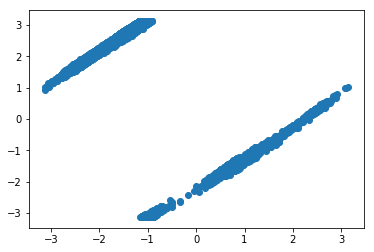

In [262]:
plt.scatter(endot,exot)

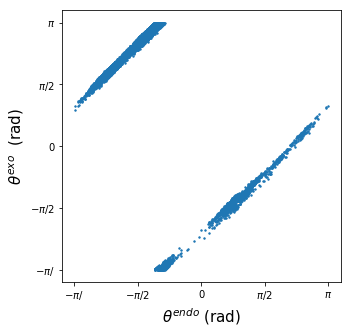

In [568]:
plt.figure(figsize=(5,5))
plt.scatter(endot,exot,s=2)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.xlabel(r"$\theta^{endo}$ (rad)",size=15)
plt.ylabel(r"$\theta^{exo}$  (rad)",size=15)
plt.savefig("Fig/CTP/endo_exo.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [5]:
tttt = []
tttc = []
ttcc = []
tctc = []
tccc = []
cccc = []
for idx, item in enumerate(dataframe[["CT0","CT1","CT2","CT3"]].values):
    if item.tolist()==["T","T","T","T"]:
        tttt.append(idx)
    elif item.tolist() in [["T","T","T","C"],["T","T","C","T"],["T","C","T","T"],["C","T","T","T"]]:
        tttc.append(idx)
    elif item.tolist() in [["T","T","C","C"],["T","C","C","T"],["C","C","T","T"]]:
        ttcc.append(idx)
    elif item.tolist() in [["T","C","T","C"],["C","T","C","T"]]:
        tctc.append(idx)
    elif item.tolist() in [["C","C","C","T"],["C","C","T","C"],["C","T","C","C"],["T","C","C","C"]]:
        tccc.append(idx)
    else:
        cccc.append(idx)

In [27]:
subset1 = dataframe.iloc[tctc][dataframe.iloc[tctc][["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1)<5][["q2","q3","q4","q5","q6","phi2","phi3","phi4","phi5","EndoT0","EndoT1","EndoT2","EndoT3","EndoT4","EndoT5","EndoT6","EndoT7","EndoT8","EndoT9","EndoT10","EndoT11","a0","a1","a2","a3","b0","b1","b2","b3"]]
subset2 = dataframe.iloc[tctc][dataframe.iloc[tctc][["q2","q3","q4","q5","q6"]].apply(np.square).sum(axis=1)>=5.5][["q2","q3","q4","q5","q6","phi2","phi3","phi4","phi5","EndoT0","EndoT1","EndoT2","EndoT3","EndoT4","EndoT5","EndoT6","EndoT7","EndoT8","EndoT9","EndoT10","EndoT11","a0","a1","a2","a3","b0","b1","b2","b3"]]

In [11]:
def GetBasis(dataframe,p,q,i,e=True):
    b1c,b1s = (dataframe["q2"]**p)*np.cos(q*(dataframe["phi2"]+2*np.pi*i*2/12)).values,(dataframe["q2"]**p)*np.sin(q*(dataframe["phi2"]+2*np.pi*i*2/12)).values
    b2c,b2s = (dataframe["q3"]**p)*np.cos(q*(dataframe["phi3"]+2*np.pi*i*3/12)).values,(dataframe["q3"]**p)*np.sin(q*(dataframe["phi3"]+2*np.pi*i*3/12)).values
    b3c,b3s = (dataframe["q4"]**p)*np.cos(q*(dataframe["phi4"]+2*np.pi*i*4/12)).values,(dataframe["q4"]**p)*np.sin(q*(dataframe["phi4"]+2*np.pi*i*4/12)).values
    b4c,b4s = (dataframe["q5"]**p)*np.cos(q*(dataframe["phi5"]+2*np.pi*i*5/12)).values,(dataframe["q5"]**p)*np.sin(q*(dataframe["phi5"]+2*np.pi*i*5/12)).values
    b5 = (dataframe["q6"]**p).values
    ones = np.ones(len(dataframe))
    if e==False:
        basis = [b1c,b1s,b2c,b2s,b3c,b3s,b4c,b4s,b5]
    else:
        basis = [ones,b1c,b1s,b2c,b2s,b3c,b3s,b4c,b4s,b5]
    return basis

def SolveBeta(X,Y):
    xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
    xty = np.matmul(np.transpose(X),Y)
    beta = np.matmul(xtx,xty)
    return beta

In [126]:
X0a = np.column_stack(GetBasis(subset1,1,1,0))
Y0a = subset1["EndoT0"]
X1a = np.column_stack(GetBasis(subset1,1,1,1))
Y1a = subset1["EndoT1"] 
X2a = np.column_stack(GetBasis(subset1,1,1,2))
Y2a = subset1["EndoT2"] 
X3a = np.column_stack(GetBasis(subset1,1,1,3))
Y3a = subset1["EndoT3"] 
X4a = np.column_stack(GetBasis(subset1,1,1,4))
Y4a = subset1["EndoT4"]
X5a = np.column_stack(GetBasis(subset1,1,1,5))
Y5a = subset1["EndoT5"] 
X6a = np.column_stack(GetBasis(subset1,1,1,6))
Y6a = subset1["EndoT6"] 
X7a = np.column_stack(GetBasis(subset1,1,1,7))
Y7a = subset1["EndoT7"] 
X8a = np.column_stack(GetBasis(subset1,1,1,8))
Y8a = subset1["EndoT8"]
X9a = np.column_stack(GetBasis(subset1,1,1,9))
Y9a = subset1["EndoT9"] 
X10a = np.column_stack(GetBasis(subset1,1,1,10))
Y10a = subset1["EndoT10"] 
X11a = np.column_stack(GetBasis(subset1,1,1,11))
Y11a = subset1["EndoT11"] 

In [12]:
X0b = np.column_stack(GetBasis(subset2,1,1,0))
Y0b = subset2["EndoT0"]
X1b = np.column_stack(GetBasis(subset2,1,1,1))
Y1b = subset2["EndoT1"] 
X2b = np.column_stack(GetBasis(subset2,1,1,2))
Y2b = subset2["EndoT2"] 
X3b = np.column_stack(GetBasis(subset2,1,1,3))
Y3b = subset2["EndoT3"] 
X4b = np.column_stack(GetBasis(subset2,1,1,4))
Y4b = subset2["EndoT4"]
X5b = np.column_stack(GetBasis(subset2,1,1,5))
Y5b = subset2["EndoT5"] 
X6b = np.column_stack(GetBasis(subset2,1,1,6))
Y6b = subset2["EndoT6"] 
X7b = np.column_stack(GetBasis(subset2,1,1,7))
Y7b = subset2["EndoT7"] 
X8b = np.column_stack(GetBasis(subset2,1,1,8))
Y8b = subset2["EndoT8"]
X9b = np.column_stack(GetBasis(subset2,1,1,9))
Y9b = subset2["EndoT9"] 
X10b = np.column_stack(GetBasis(subset2,1,1,10))
Y10b = subset2["EndoT10"] 
X11b = np.column_stack(GetBasis(subset2,1,1,11))
Y11b = subset2["EndoT11"] 

In [128]:
beta0 = SolveBeta(X0a,Y0a)
beta1 = SolveBeta(X1a,Y1a)
beta2 = SolveBeta(X2a,Y2a)
beta3 = SolveBeta(X3a,Y3a)
beta4 = SolveBeta(X4a,Y4a)
beta5 = SolveBeta(X5a,Y5a)
beta6 = SolveBeta(X6a,Y6a)
beta7 = SolveBeta(X7a,Y7a)
beta8 = SolveBeta(X8a,Y8a)
beta9 = SolveBeta(X9a,Y9a)
beta10 = SolveBeta(X10a,Y10a)
beta11 = SolveBeta(X11a,Y11a)

In [129]:
betb0 = SolveBeta(X0b,Y0b)
betb1 = SolveBeta(X1b,Y1b)
betb2 = SolveBeta(X2b,Y2b)
betb3 = SolveBeta(X3b,Y3b)
betb4 = SolveBeta(X4b,Y4b)
betb5 = SolveBeta(X5b,Y5b)
betb6 = SolveBeta(X6b,Y6b)
betb7 = SolveBeta(X7b,Y7b)
betb8 = SolveBeta(X8b,Y8b)
betb9 = SolveBeta(X9b,Y9b)
betb10 = SolveBeta(X10b,Y10b)
betb11 = SolveBeta(X11b,Y11b)

In [130]:
X = np.hstack([np.matmul(X0a,beta0),np.matmul(X1a,beta1),np.matmul(X2a,beta2),np.matmul(X3a,beta3),
              np.matmul(X5a,beta5),np.matmul(X6a,beta6),np.matmul(X8a,beta8),np.matmul(X9a,beta9),
              np.matmul(X11a,beta11), np.matmul(X0b,betb0),np.matmul(X2b,betb2),np.matmul(X3b,betb3),
              np.matmul(X5b,betb5),np.matmul(X6b,betb6),np.matmul(X8b,betb8),np.matmul(X9b,betb9),
              np.matmul(X11b,betb11)])
Y = np.hstack([Y0a,Y1a,Y2a,Y3a,Y5a,Y6a,Y8a,Y9a,Y11a,Y0b,Y2b,Y3b,Y5b,Y6b,Y8b,Y9b,Y11b])

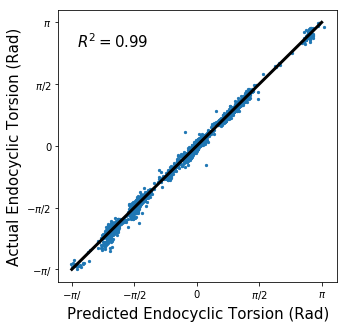

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y,s=5)
plt.plot([-np.pi,np.pi],[-np.pi,np.pi],lw=3,color="black")
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.text(-3,2.5,r"$R^{2}=0.99$",size=15)
plt.xlabel("Predicted Endocyclic Torsion (Rad)",size=15)
plt.ylabel("Actual Endocyclic Torsion (Rad)",size=15)
plt.savefig("Fig/CTP/endo_torsion.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [29]:
subset1a = subset1.dropna()
subset1b = subset2.dropna()

basis1a = GetBasis(subset1a,1,1,0)
basis1b = GetBasis(subset1a,2,2,0,e=False)
sqq = subset1a[["q2","q3","q4","q5"]].apply(np.square).values

In [30]:
basis2a = GetBasis(subset1b,1,1,0)
basis2b = GetBasis(subset1b,2,2,0,e=False)
sqq1 = subset1b[["q2","q3","q4","q5"]].apply(np.square).values

In [43]:
ebasis = np.column_stack(basis1a+basis1b+[sqq])
Xe = ebasis
cb1 = subset1a["b3"].values
xtxe = np.linalg.inv(np.matmul(np.transpose(Xe),Xe))
xtye1 = np.matmul(np.transpose(Xe),cb1)
bt1 = np.matmul(xtxe,xtye1)

In [44]:
y0 = np.matmul(Xe,bt1)

array([[1.        , 0.99897024],
       [0.99897024, 1.        ]])

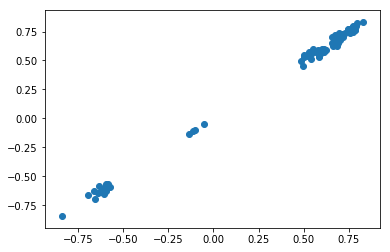

In [45]:
plt.scatter(y0,subset1a["b3"])
np.corrcoef(y0,subset1a["b3"])

(array([ 1.,  0., 37., 27.,  1., 12.,  9.,  0.,  0.,  1.]),
 array([-1.7166872 , -1.33538916, -0.95409113, -0.57279309, -0.19149506,
         0.18980298,  0.57110101,  0.95239905,  1.33369708,  1.71499512,
         2.09629315]),
 <a list of 10 Patch objects>)

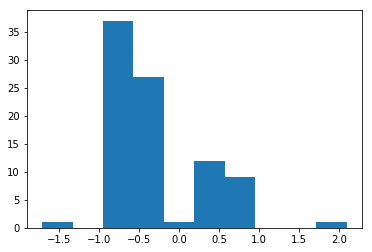

In [23]:
plt.hist(y0)

In [198]:
ebasis = np.column_stack(basis1a+basis1b+[sqq])

Xe = ebasis
cb1 = subset1a["a0"].values
cb2 = subset1a["a1"].values
cb3 = subset1a["a2"].values
cb4 = subset1a["a3"].values

xtxe = np.linalg.inv(np.matmul(np.transpose(Xe),Xe))
xtye1 = np.matmul(np.transpose(Xe),cb1)
xtye2 = np.matmul(np.transpose(Xe),cb2)
xtye3 = np.matmul(np.transpose(Xe),cb3)
xtye4 = np.matmul(np.transpose(Xe),cb4)

bt1 = np.matmul(xtxe,xtye1)
bt2 = np.matmul(xtxe,xtye2)
bt3 = np.matmul(xtxe,xtye3)
bt4 = np.matmul(xtxe,xtye4)

In [199]:
ebasis1 = np.column_stack(basis2a+basis2b+[sqq1])

Xe1 = ebasis1
cba1 = subset1b["a0"].values
cba2 = subset1b["a1"].values
cba3 = subset1b["a2"].values
cba4 = subset1b["a3"].values

xtxe = np.linalg.inv(np.matmul(np.transpose(Xe1),Xe1))
xtye1 = np.matmul(np.transpose(Xe1),cba1)
xtye2 = np.matmul(np.transpose(Xe1),cba2)
xtye3 = np.matmul(np.transpose(Xe1),cba3)
xtye4 = np.matmul(np.transpose(Xe1),cba4)

bte1 = np.matmul(xtxe,xtye1)
bte2 = np.matmul(xtxe,xtye2)
bte3 = np.matmul(xtxe,xtye3)
bte4 = np.matmul(xtxe,xtye4)

In [186]:
y0 = np.matmul(Xe,bt1)
y1 = np.matmul(Xe,bt2)
y2 = np.matmul(Xe,bt3)
y3 = np.matmul(Xe,bt4)

In [200]:
y4 = np.matmul(Xe1,bte1)
y5 = np.matmul(Xe1,bte2)
y6 = np.matmul(Xe1,bte3)
y7 = np.matmul(Xe1,bte4)

In [220]:
len(Y1)

8

In [221]:
X = np.concatenate([y0,y1,y2,y3,y4,y5,y6,y7])
Y1 = np.concatenate([subset1a["a0"],subset1a["a1"],subset1a["a2"],subset1a["a3"],subset1b["a0"],subset1b["a1"],subset1b["a2"],subset1b["a3"]])

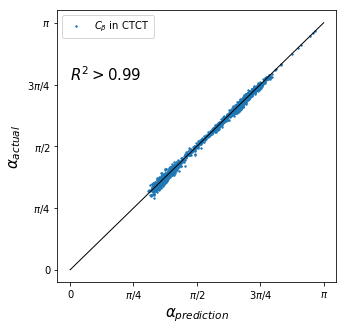

In [232]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y1,s=2,label=r"$C_{\beta}$ in CTCT")
plt.plot([0,np.pi/2,np.pi],[0,np.pi/2,np.pi],lw=1,color="black")
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],labels=[r"0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$"])
plt.yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],labels=[r"0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$"])
plt.legend()
plt.ylabel(r"$\alpha_{actual}$",size=15)
plt.xlabel(r"$\alpha_{prediction}$",size=15)
plt.text(0,2.4,r"$R^{2}>0.99$",size=15)
plt.savefig("Fig/CTP/alpha_prediction.pdf",dpi=150,bbox_inches="tight")
plt.show()

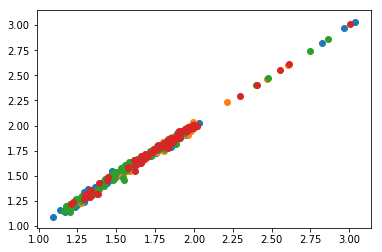

In [190]:
plt.scatter(y0,subset1a["a0"])
plt.scatter(y1,subset1a["a1"])
plt.scatter(y2,subset1a["a2"])
plt.scatter(y3,subset1a["a3"])

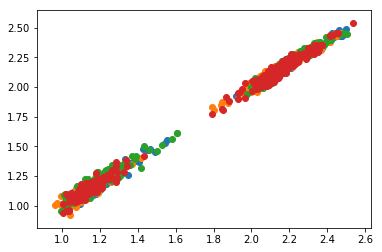

In [201]:
plt.scatter(y4,subset1b["a0"])
plt.scatter(y5,subset1b["a1"])
plt.scatter(y6,subset1b["a2"])
plt.scatter(y7,subset1b["a3"])

In [517]:
def SolBeta(X,Y,beta_init,step=2500):
    beta_old = beta_init 
    for i in range(step):
        G2 = np.diag(2/(1+(np.matmul(X,beta_old)**2)))**2
        XTG2 = np.matmul(np.transpose(X),G2)
        XTG2Xinv = np.linalg.inv(np.matmul(XTG2,X))
        XTG2Y = np.matmul(XTG2,Y)
        beta_new = beta_old + np.matmul(XTG2Xinv,XTG2Y)
        print(max(np.abs(beta_new-beta_old)))
        if max(np.abs(beta_new-beta_old))<1:
            print("yes")
        beta_old = beta_new
    return beta_new

In [562]:
X = np.array([107,46,33,67,122,69,43,30,12,25,37,69,5,83,68,38,21,1,71,60,71,71,57,53,38,70,7,48,7,21,27])
Y = np.transpose(np.array([[67,66,74,61,58,60,100,89,171,166,98,60,197,98,86,123,165,133,101,105,71,84,75,98,83,71,74,91,38,200,56]]))

In [563]:
beta_init = np.array([[1]]).reshape(1,1)

In [564]:
beta_old = beta_init 
for i in range(50):
    G2 = np.diag(2/(1+(X(beta_old)**2)))**2
    XTG2 = np.matmul(np.transpose(X),G2)
    XTG2Xinv = np.linalg.inv(np.matmul(XTG2,X))
    XTG2Y = np.matmul(XTG2,Y)
    beta_new = beta_old + np.matmul(XTG2Xinv,XTG2Y)
    print(max(np.abs(beta_new-beta_old)))
    if max(np.abs(beta_new-beta_old))<1:
        print("yes")
    beta_old = beta_new

ValueError: shapes (31,) and (1,1) not aligned: 31 (dim 0) != 1 (dim 0)

In [548]:

beta_init = np.ones(1)

In [549]:
beta_old = beta_init

In [550]:
SolBeta(X,Y,beta_init)

ValueError: shapes (31,) and (1,) not aligned: 31 (dim 0) != 1 (dim 0)

In [166]:
X4a = np.column_stack(GetBasis(subset1,1,1,10))
Y4a = subset1["EndoT10"]
beta4 = SolveBeta(X10a,Y10a)

In [169]:
xx = np.mod(np.matmul(X10a,beta10),2*np.pi)
yy = np.mod(Y4a,2*np.pi)

In [150]:
X = np.hstack([np.matmul(X0a,beta0),np.matmul(X1a,beta1),np.matmul(X2a,beta2),np.matmul(X3a,beta3),
              np.matmul(X5a,beta5),np.matmul(X6a,beta6),np.matmul(X8a,beta8),np.matmul(X9a,beta9),
              np.matmul(X11a,beta11)])
Y = np.hstack([Y0a,Y1a,Y2a,Y3a,Y5a,Y6a,Y8a,Y9a,Y11a])

In [151]:
np.corrcoef(X,Y)

array([[1.        , 0.99865034],
       [0.99865034, 1.        ]])

In [ ]:
y0 = np.matmul(X1,beta1)
y2 = np.matmul(X2,beta2)

In [19]:
cos1a, sin1a = subset1.iloc[:,0]*np.cos(subset1.iloc[:,5]),subset1.iloc[:,0]*np.sin(subset1.iloc[:,5])
cos2a, sin2a = subset1.iloc[:,1]*np.cos(subset1.iloc[:,6]), subset1.iloc[:,1]*np.sin(subset1.iloc[:,6])
cos3a, sin3a = subset1.iloc[:,2]*np.cos(subset1.iloc[:,7]), subset1.iloc[:,2]*np.sin(subset1.iloc[:,7])
cos4a, sin4a = subset1.iloc[:,3]*np.cos(subset1.iloc[:,8]),subset1.iloc[:,3]*np.sin(subset1.iloc[:,8])
fa, onesa = subset1.iloc[:,4], np.ones(len(subset1))

cos1b, sin1b = subset2.iloc[:,0]*np.cos(subset2.iloc[:,5]),subset2.iloc[:,0]*np.sin(subset2.iloc[:,5])
cos2b, sin2b = subset2.iloc[:,1]*np.cos(subset2.iloc[:,6]), subset2.iloc[:,1]*np.sin(subset2.iloc[:,6])
cos3b, sin3b = subset2.iloc[:,2]*np.cos(subset2.iloc[:,7]), subset2.iloc[:,2]*np.sin(subset2.iloc[:,7])
cos4b, sin4b = subset2.iloc[:,3]*np.cos(subset2.iloc[:,8]),subset2.iloc[:,3]*np.sin(subset2.iloc[:,8])
fb, onesb = subset2.iloc[:,4].values, np.ones(len(subset2))

Y1 = subset1.iloc[:,-1].values
Y2 = subset2.iloc[:,-1].values

X1 = np.column_stack([onesa,cos1a,sin1a,cos2a,sin2a,cos3a,sin3a,cos4a,sin4a,fa])
xtx1 = np.linalg.inv(np.matmul(np.transpose(X1),X1))
xty1 = np.matmul(np.transpose(X1),Y1)
beta1 = np.matmul(xtx1,xty1)


X2 = np.column_stack([onesb,cos1b,sin1b,cos2b,sin2b,cos3b,sin3b,cos4b,sin4b,fb])
xtx2 = np.linalg.inv(np.matmul(np.transpose(X2),X2))
xty2 = np.matmul(np.transpose(X2),Y2)
beta2 = np.matmul(xtx2,xty2)

In [20]:
y1 = np.matmul(X1,beta1)
y2 = np.matmul(X2,beta2)

In [308]:
cos1, sin1 = cps.iloc[:,0]*np.cos(cps.iloc[:,5]),cps.iloc[:,0]*np.sin(cps.iloc[:,5])
cos2, sin2 = cps.iloc[:,1]*np.cos(cps.iloc[:,6]), cps.iloc[:,1]*np.sin(cps.iloc[:,6])
cos3, sin3 = cps.iloc[:,2]*np.cos(cps.iloc[:,7]), cps.iloc[:,2]*np.sin(cps.iloc[:,7])
cos4, sin4 = cps.iloc[:,3]*np.cos(cps.iloc[:,8]),cps.iloc[:,3]*np.sin(cps.iloc[:,8])
f, ones = cps.iloc[:,4], np.ones(len(cps))
q1 = cps.iloc[:,0]
q2 = cps.iloc[:,1]
q3 = cps.iloc[:,2]
q4 = cps.iloc[:,3]
cos1s, sin1s = (cps.iloc[:,0]**2)*np.cos(2*cps.iloc[:,5]),(cps.iloc[:,0]**2)*np.sin(2*cps.iloc[:,5])
cos2s, sin2s = (cps.iloc[:,1]**2)*np.cos(2*cps.iloc[:,6]), (cps.iloc[:,1]**2)*np.sin(2*cps.iloc[:,6])
cos3s, sin3s = (cps.iloc[:,2]**2)*np.cos(2*cps.iloc[:,7]), (cps.iloc[:,2]**2)*np.sin(2*cps.iloc[:,7])
cos4s, sin4s = (cps.iloc[:,3]**2)*np.cos(2*cps.iloc[:,8]), (cps.iloc[:,3]**2)*np.sin(2*cps.iloc[:,8])

cos1c, sin1c = (cps.iloc[:,0]**3)*np.cos(3*cps.iloc[:,5]),(cps.iloc[:,0]**3)*np.sin(3*cps.iloc[:,5])
cos2c, sin2c = (cps.iloc[:,1]**3)*np.cos(3*cps.iloc[:,6]), (cps.iloc[:,1]**3)*np.sin(3*cps.iloc[:,6])
cos3c, sin3c = (cps.iloc[:,2]**3)*np.cos(3*cps.iloc[:,7]), (cps.iloc[:,2]**3)*np.sin(3*cps.iloc[:,7])
cos4c, sin4c = (cps.iloc[:,3]**3)*np.cos(3*cps.iloc[:,8]), (cps.iloc[:,3]**3)*np.sin(3*cps.iloc[:,8])

cos1d, sin1d = (cps.iloc[:,0]**4)*np.cos(4*cps.iloc[:,5]),(cps.iloc[:,0]**4)*np.sin(4*cps.iloc[:,5])
cos2d, sin2d = (cps.iloc[:,1]**4)*np.cos(4*cps.iloc[:,6]), (cps.iloc[:,1]**4)*np.sin(4*cps.iloc[:,6])
cos3d, sin3d = (cps.iloc[:,2]**4)*np.cos(4*cps.iloc[:,7]), (cps.iloc[:,2]**4)*np.sin(4*cps.iloc[:,7])
cos4d, sin4d = (cps.iloc[:,3]**4)*np.cos(4*cps.iloc[:,8]), (cps.iloc[:,3]**4)*np.sin(4*cps.iloc[:,8])


In [309]:
X = np.column_stack([ones,cos1,sin1,cos2,sin2,cos3,sin3,cos4,sin4, f,q1**2,q2**2,q3**2,q4**2, f**2, 
                     cos1s,sin1s,cos2s,sin2s,cos3s,sin3s,cos4s,sin4s])
Y0 = cps.iloc[:,-1].values

In [311]:
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
xty = np.matmul(np.transpose(X),Y0)
beta = np.matmul(xtx,xty)

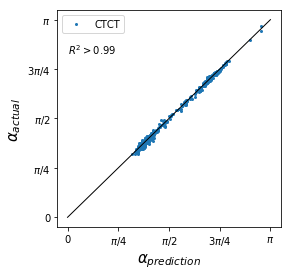

In [351]:
plt.figure(figsize=(4,4))
plt.scatter(np.matmul(X,beta),Y0,s=4,label="CTCT")
plt.plot([0,np.pi/2,np.pi],[0,np.pi/2,np.pi],lw=1,color="black")
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],labels=[r"0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$"])
plt.yticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],labels=[r"0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$"])
plt.legend()
plt.ylabel(r"$\alpha_{actual}$",size=15)
plt.xlabel(r"$\alpha_{prediction}$",size=15)
plt.text(0,2.6,r"$R^{2}>0.99$")
plt.savefig("Fig/CTP/alpha_prediction.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [16]:
# Puckering preference --> Endocyclic Torsion Angle
dataframe = pd.DataFrame(outcome)

In [205]:
subset1 = dataframe.iloc[cccc,[0]+list(range(5,14))+list(range(26,38))]

In [208]:
dataframe.iloc[4,0]

4

In [312]:
subset0 = dataframe.iloc[tctc][["q2","q3","q4","q5","q6","phi2","phi3","phi4","phi5","EndoT0"]]


In [313]:
cos1, sin1 = subset0.iloc[:,0]*np.cos(subset0.iloc[:,5]),subset0.iloc[:,0]*np.sin(subset0.iloc[:,5])
cos2, sin2 = subset0.iloc[:,1]*np.cos(subset0.iloc[:,6]), subset0.iloc[:,1]*np.sin(subset0.iloc[:,6])
cos3, sin3 = subset0.iloc[:,2]*np.cos(subset0.iloc[:,7]), subset0.iloc[:,2]*np.sin(subset0.iloc[:,7])
cos4, sin4 = subset0.iloc[:,3]*np.cos(subset0.iloc[:,8]),subset0.iloc[:,3]*np.sin(subset0.iloc[:,8])
f, ones = subset0.iloc[:,4], np.ones(len(subset0))

cos1a, sin1a = subset1.iloc[:,0]*np.cos(subset1.iloc[:,5]),subset1.iloc[:,0]*np.sin(subset1.iloc[:,5])
cos2a, sin2a = subset1.iloc[:,1]*np.cos(subset1.iloc[:,6]), subset1.iloc[:,1]*np.sin(subset1.iloc[:,6])
cos3a, sin3a = subset1.iloc[:,2]*np.cos(subset1.iloc[:,7]), subset1.iloc[:,2]*np.sin(subset1.iloc[:,7])
cos4a, sin4a = subset1.iloc[:,3]*np.cos(subset1.iloc[:,8]),subset1.iloc[:,3]*np.sin(subset1.iloc[:,8])
fa, onesa = subset1.iloc[:,4], np.ones(len(subset1))

cos1b, sin1b = subset2.iloc[:,0]*np.cos(subset2.iloc[:,5]),subset2.iloc[:,0]*np.sin(subset2.iloc[:,5])
cos2b, sin2b = subset2.iloc[:,1]*np.cos(subset2.iloc[:,6]), subset2.iloc[:,1]*np.sin(subset2.iloc[:,6])
cos3b, sin3b = subset2.iloc[:,2]*np.cos(subset2.iloc[:,7]), subset2.iloc[:,2]*np.sin(subset2.iloc[:,7])
cos4b, sin4b = subset2.iloc[:,3]*np.cos(subset2.iloc[:,8]),subset2.iloc[:,3]*np.sin(subset2.iloc[:,8])
fb, onesb = subset2.iloc[:,4].values, np.ones(len(subset2))

Y0 = subset0.iloc[:,-1].values
Y1 = subset1.iloc[:,-1].values
Y2 = subset2.iloc[:,-1].values

X0 = np.column_stack([ones,cos1,sin1,cos2,sin2,cos3,sin3,cos4,sin4,f])
xtx0 = np.linalg.inv(np.matmul(np.transpose(X0),X0))
xty0 = np.matmul(np.transpose(X0),Y0)
beta0 = np.matmul(xtx0,xty0)

X1 = np.column_stack([onesa,cos1a,sin1a,cos2a,sin2a,cos3a,sin3a,cos4a,sin4a,fa])
xtx1 = np.linalg.inv(np.matmul(np.transpose(X1),X1))
xty1 = np.matmul(np.transpose(X1),Y1)
beta1 = np.matmul(xtx1,xty1)


X2 = np.column_stack([onesb,cos1b,sin1b,cos2b,sin2b,cos3b,sin3b,cos4b,sin4b,fb])
xtx2 = np.linalg.inv(np.matmul(np.transpose(X2),X2))
xty2 = np.matmul(np.transpose(X2),Y2)
beta2 = np.matmul(xtx2,xty2)


In [319]:
y0 = np.matmul(X0, beta0)
y1 = np.matmul(X1,beta1)
y2 = np.matmul(X2,beta2)

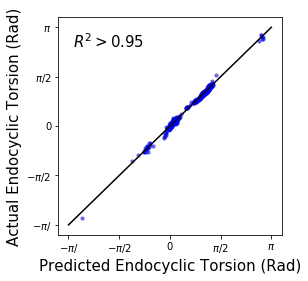

In [336]:
plt.figure(figsize=(4,4))
plt.scatter(y1,Y1,s=10,alpha=.5,color="b")
plt.scatter(y2,Y2,s=10,alpha=.5,color="b")
plt.plot([-np.pi,0,np.pi],[-np.pi,0,np.pi],color="black")
plt.xlabel("Predicted Endocyclic Torsion (Rad)",size=15)
plt.ylabel("Actual Endocyclic Torsion (Rad)",size=15)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.text(-3,2.5,r"$R^{2}>0.95$",size=15)
plt.savefig("Fig/CTP/endo_torsion.pdf",dpi=150,bbox_inches="tight")
plt.show()

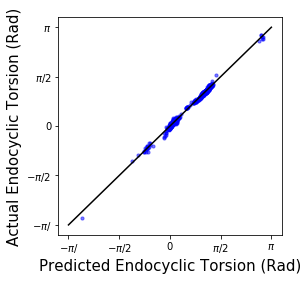

In [333]:
plt.figure(figsize=(4,4))
plt.scatter(y1,Y1,s=10,alpha=.5,color="b")
plt.scatter(y2,Y2,s=10,alpha=.5,color="b")
plt.plot([-np.pi,0,np.pi],[-np.pi,0,np.pi],color="black")
plt.xlabel("Predicted Endocyclic Torsion (Rad)",size=15)
plt.ylabel("Actual Endocyclic Torsion (Rad)",size=15)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           labels=[r"$-\pi/$",r"$-\pi/2$",r"0",r"$\pi/2$",r"$\pi$"])
plt.show()

In [321]:
np.corrcoef(y0,Y0)

array([[1.        , 0.95844802],
       [0.95844802, 1.        ]])

In [322]:
np.corrcoef(y1,Y1)

array([[1.        , 0.99866891],
       [0.99866891, 1.        ]])

In [323]:
np.corrcoef(y2,Y2)

array([[1.        , 0.99683559],
       [0.99683559, 1.        ]])

In [188]:
subset = subset1[subset1.iloc[:,:5].apply(np.square).sum(axis=1).apply(np.sqrt)>1.75]

In [189]:
cos1, sin1 = subset.iloc[:,0]*np.cos(subset.iloc[:,5]),subset.iloc[:,0]*np.sin(subset.iloc[:,5])
cos2, sin2 = subset.iloc[:,1]*np.cos(subset.iloc[:,6]), subset.iloc[:,1]*np.sin(subset.iloc[:,6])
cos3, sin3 = subset.iloc[:,2]*np.cos(subset.iloc[:,7]), subset.iloc[:,2]*np.sin(subset.iloc[:,7])
cos4, sin4 = subset.iloc[:,3]*np.cos(subset.iloc[:,8]),subset.iloc[:,3]*np.sin(subset.iloc[:,8])
f, ones = subset.iloc[:,4], np.ones(len(subset))
Y0 = subset.iloc[:,11].values

q1 = subset.iloc[:,0]
q2 = subset.iloc[:,1]
q3 = subset.iloc[:,2]
q4 = subset.iloc[:,3]
cos1s, sin1s = np.cos(2*subset.iloc[:,5]),np.sin(2*subset.iloc[:,5])
cos2s, sin2s = np.cos(2*subset.iloc[:,6]), np.sin(2*subset.iloc[:,6])
cos3s, sin3s = np.cos(2*subset.iloc[:,7]), np.sin(2*subset.iloc[:,7])
cos4s, sin4s = np.cos(2*subset.iloc[:,8]), np.sin(2*subset.iloc[:,8])

In [190]:
beta

array([ 0.43003475,  0.13112897,  0.56976913,  0.5189975 , -0.68507907,
       -1.52755922, -0.30658849, -0.44781773,  3.13605962,  1.55294538])

In [196]:
beta

array([ 0.11049448,  0.06809978,  0.32886031,  0.6305453 , -0.68803349,
       -1.85258963, -0.50804439,  0.03753719,  2.87373538,  2.1322917 ])

In [191]:
np.sqrt((-0.59694663)**2 + (0.31105958)**2)

0.6731295130791202

In [192]:
np.arctan2(-0.26444831/0.3999459691562155,0.30003978/0.3999459691562155)

-0.7224306372313299

In [193]:
np.arctan2(-0.59694663/0.6731295130791202,0.31105958/0.6731295130791202)

-1.0904238197229041

In [194]:
X = np.column_stack([ones,cos1,sin1,cos2,sin2,cos3,sin3,cos4,sin4,f])
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
xty = np.matmul(np.transpose(X),Y0)
beta = np.matmul(xtx,xty)

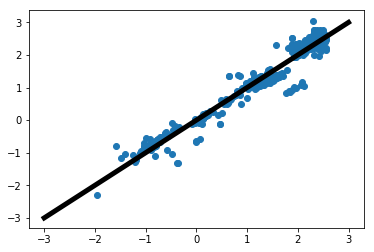

[[1.         0.97476665]
 [0.97476665 1.        ]]


In [195]:
plt.scatter(np.matmul(X,beta),Y0)
plt.plot([-3,3],[-3,3],lw=5,color="black")
plt.show()
print(np.corrcoef(np.matmul(X,beta),Y0))

In [297]:
cistrans_i = []
for idx, item in enumerate(ke.values):
    tmp = []
    for x in item[14:18]:
        if np.abs(x)<np.pi/6:
            tmp.append("C")
        elif np.abs(x)>np.pi*5/6:
            tmp.append("T")
        else:
            print(idx)
    cistrans_i.append(tmp)

In [63]:
cccc = pd.DataFrame(outcome).iloc[check,:]

In [436]:
check = []
for idx, item in enumerate(cistrans_i):
    if (item==["C","C","C","C"]) : 
        check.append(idx)

In [425]:
check = []
for idx, item in enumerate(cistrans_i):
    if (item==["T","C","T","C"]) or (item==["C","T","C","T"]) : 
        check.append(idx)

In [354]:
check = []
for idx, item in enumerate(cistrans_i):
    if (item==["T","T","C","C"]) or (item==["C","T","T","C"]) or (item==["C","C","T","T"]) or (item==["T","C","C","T"]): 
        check.append(idx)

In [375]:
len(check)

674

In [384]:
check = []
for idx, item in enumerate(cistrans_i):
    if (item==["T","C","C","C"]) or (item==["C","C","C","T"]) or (item==["C","T","C","C"]) or (item==["C","C","T","C"]): 
        check.append(idx)

In [29]:
len(check)/len(cistrans_i)

0.4372474310125852

In [223]:
smarts = Chem.MolFromSmarts("[C;R1]@[N;R1]@[C;R1]!@;-[$([CH2X4][OX2H])]")
dsmarts = Chem.MolFromSmarts("[C;R1](=[O])@[C;R1]@[N;R1]")

In [224]:
result = []
ss = []
for idx, mol in enumerate(peptide):
    smatches = mol.GetSubstructMatches(smarts)
    dmatches = mol.GetSubstructMatches(dsmarts)
    bonds = []
    for bond in mol.GetBonds():
        bonds.append((bond.GetBeginAtom().GetIdx(),bond.GetEndAtom().GetIdx()))
    data = py_rdl.Calculator.get_calculated_result(bonds)
    for urf in data.urfs:
        rcs = data.get_relevant_cycles_for_urf(urf)
        for rc in rcs:
            if len(list(rc.nodes))==12:
                ringloop = RA.Rearrangement(mol, list(rc.nodes))
                coord = np.array([mol.GetConformer().GetAtomPosition(atom) for atom in ringloop])
                ccoord = RA.Translate(coord)
                cptmp = RA.GetRingPuckerCoords(ccoord)
                bond = RA.GetRingBonds(mol, ringloop)
                bondtype = [item[1] for item in bond]
                atomtype = RA.GetRingAtomType(mol, ringloop)
                torsion = [rdMolTransforms.GetDihedralRad(mol.GetConformer(),*[ringloop[x] for x in [(i)%12,(i+1)%12,(i+2)%12,(i+3)%12]]) for i in range(12) ]
                storsions = []
                for m in smatches:
                    ni = ringloop.index(m[2])
                    storsions.append([(ni, rdMolTransforms.GetDihedralRad(mol.GetConformer(),m[3], ringloop[ni],ringloop[(ni+1)%12],ringloop[(ni+2)%12]))])
                dtorsions = []
                for m in dmatches:
                    ni = ringloop.index(m[0])
                    dtorsions.append([(ni, rdMolTransforms.GetDihedralRad(mol.GetConformer(),m[1], ringloop[ni],ringloop[(ni+1)%12],ringloop[(ni+2)%12]))])
                result.append((idx,*cptmp[0],*cptmp[1],*bondtype,*atomtype,*torsion,storsions,dtorsions))
                for m in smatches:
                    if (m[2] in ringloop) and (ringloop.index(m[2])==1) :
                        ss.append((idx,*cptmp[0],*cptmp[1],*bondtype,*atomtype, *RA.GetRingSubstituentPosition(mol, ringloop, [m[2],m[3]])))
                

In [7]:
s1 = pd.DataFrame(ss)

In [190]:
tf = []
for idx, item in enumerate(data.iloc[s1.iloc[:,0]][["P1","P2","P3","P4"]].values):
    check = [x=="C" for x in item]
    tf.append(sum(check)==4)

In [191]:
ss1 = s1[tf]

In [208]:
c1,c2,c3,c4,c5 = ss1.iloc[:,1],ss1.iloc[:,2],ss1.iloc[:,3],ss1.iloc[:,4],ss1.iloc[:,5]
p1,p2,p3,p4 = ss1.iloc[:,6],ss1.iloc[:,7],ss1.iloc[:,8],ss1.iloc[:,9]
Y = ss1.iloc[:,34]

In [209]:
def f(p,n):
    return (c1**p)*np.cos(n*p1),(c2**p)*np.cos(n*p2),(c3**p)*np.cos(n*p3),(c4**p)*np.cos(n*p4), (c1**p)*np.sin(n*p1),(c2**p)*np.sin(n*p2),(c3**p)*np.sin(n*p3),(c4**p)*np.sin(n*p4)
                

In [214]:
X = np.column_stack([np.ones(len(c1)),*f(2,2),c5**2, c4**2,c3**2,c2**2,c1**2, *f(1,1), c5])

In [215]:
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
xty = np.matmul(np.transpose(X),Y)
beta = np.matmul(xtx,xty)
xb = np.matmul(X,beta)

In [216]:
beta

array([ 3.21674086,  0.05285096,  0.05880746,  0.73204075, -1.08562422,
        0.02967374,  0.1111826 , -6.22379422, -1.58333225, -2.05634742,
       -2.83983014,  5.56350587, -0.30244567, -0.15563294, -0.28207631,
        0.15942561, -1.1984949 ,  0.77574124,  0.50181632,  0.35362277,
        1.68541185, -0.01051251,  0.3115675 ])

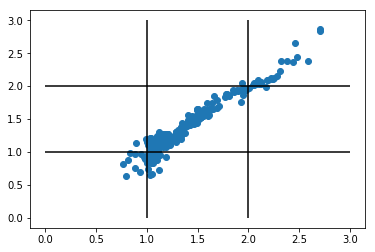

In [222]:
plt.scatter(xb,Y)
plt.vlines(2,0,3)
plt.hlines(2,0,3)
plt.hlines(1,0,3)
plt.vlines(1,0,3)

plt.show()

In [218]:
np.corrcoef(xb,Y)

array([[1.        , 0.96835492],
       [0.96835492, 1.        ]])

In [62]:
outcome = pd.DataFrame(result)

In [63]:
endocyclic_torsion = outcome.iloc[:,34:45]
cps = outcome.iloc[:,1:10]

In [179]:
cos1, sin1 = cps.iloc[:,0]*np.cos(cps.iloc[:,5]),cps.iloc[:,0]*np.sin(cps.iloc[:,5])
cos2, sin2 = cps.iloc[:,1]*np.cos(cps.iloc[:,6]), cps.iloc[:,1]*np.sin(cps.iloc[:,6])
cos3, sin3 = cps.iloc[:,2]*np.cos(cps.iloc[:,7]), cps.iloc[:,2]*np.sin(cps.iloc[:,7])
cos4, sin4 = cps.iloc[:,3]*np.cos(cps.iloc[:,8]),cps.iloc[:,3]*np.sin(cps.iloc[:,8])
f, ones = cps.iloc[:,4], np.ones(len(cps))

In [180]:
X = np.column_stack([ones, cos1, sin1, cos2,sin2, cos3, sin3, cos4, sin4])
Y0 = endocyclic_torsion.iloc[:,0]
Y1 = endocyclic_torsion.iloc[:,0]

In [181]:
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
xty = np.matmul(np.transpose(X),Y0)
beta = np.matmul(xtx,xty)

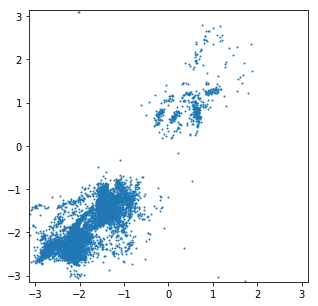

array([[1.        , 0.87892486],
       [0.87892486, 1.        ]])

In [182]:
plt.figure(figsize=(5,5))
plt.scatter(np.matmul(X,beta),Y0,s=1)
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.show()
np.corrcoef(np.matmul(X,beta),Y0)

In [196]:
exo_d1 = []
exo_c1 = []
for idx, item in enumerate(outcome.iloc[:,47].values):
    if any(item):
        for d in item:
            if d[0][0]==0:
                exo_d1.append((outcome.iloc[idx,45],d[0][1]))
            elif d[0][0]==3:
                exo_d1.append((outcome.iloc[idx,36],d[0][1]))
            elif d[0][0]==6:
                exo_d1.append((outcome.iloc[idx,39],d[0][1]))
            elif d[0][0]==9:
                exo_d1.append((outcome.iloc[idx,42],d[0][1]))
            else:
                continue
                
for idx, item in enumerate(outcome.iloc[:,46].values):
    if any(item):
        for d in item:
            if d[0][0]==1:
                exo_c1.append((outcome.iloc[idx,34],d[0][1]))
            elif d[0][0]==4:
                exo_c1.append((outcome.iloc[idx,37],d[0][1]))
            elif d[0][0]==7:
                exo_c1.append((outcome.iloc[idx,40],d[0][1]))
            elif d[0][0]==10:
                exo_c1.append((outcome.iloc[idx,43],d[0][1]))
            else:
                continue

In [207]:
oxygen = pd.DataFrame(exo_d1)
carbon = pd.DataFrame(exo_c1)

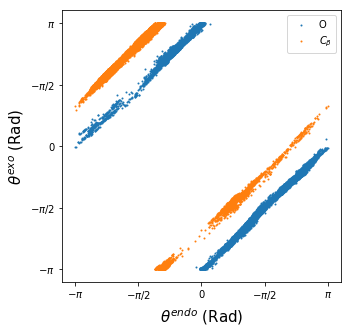

In [213]:
plt.figure(figsize=(5,5))
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],labels=[r"$-\pi$",r"$-\pi/2$","0",r"$-\pi/2$",r"$\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],labels=[r"$-\pi$",r"$-\pi/2$","0",r"$-\pi/2$",r"$\pi$"])
plt.xlabel(r"$\theta^{endo}$ (Rad)",size=15)
plt.ylabel(r"$\theta^{exo}$ (Rad)",size=15)
plt.scatter(oxygen.iloc[:,0],oxygen.iloc[:,1],s=1, label="O")
plt.scatter(carbon.iloc[:,0],carbon.iloc[:,1],s=1, label=r"$C_{\beta}$")
plt.legend()
plt.savefig("Fig/CTP/ctps_endo_exo.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [600]:
data1 = data.iloc[tctc,:].dropna()
cp = data1[["q2","q3","q4","q5","q6","phi2","phi3","phi4","phi5"]]
a1 = data1["a1"]
a2 = data1["a2"]
a3 = data1["a3"]
a4 = data1["a4"]
b1 = data1["b1"]

In [64]:
max(cccc)

8660

In [601]:
cp1a,cp1b = (cp.iloc[:,0]**2)*np.cos(2*cp.iloc[:,5]+8*np.pi/12), (cp.iloc[:,0]**2)*np.sin(2*cp.iloc[:,5]+8*np.pi/12)
cp2a,cp2b = (cp.iloc[:,1]**2)*np.cos(2*cp.iloc[:,6]+8*np.pi/12), (cp.iloc[:,0]**2)*np.sin(2*cp.iloc[:,6]+8*np.pi/12)
cp3a,cp3b = (cp.iloc[:,2]**2)*np.cos(2*cp.iloc[:,7]+8*np.pi/12), (cp.iloc[:,0]**2)*np.sin(2*cp.iloc[:,7]+8*np.pi/12)
cp4a,cp4b = (cp.iloc[:,3]**2)*np.cos(2*cp.iloc[:,8]+8*np.pi/12), (cp.iloc[:,0]**2)*np.sin(2*cp.iloc[:,8]+8*np.pi/12)
cp5 = (cp.iloc[:,4]**2)

In [624]:
X = np.column_stack([np.ones(len(cp1a)),cp1a,cp1b,cp2a,cp2b,cp3a,cp3b,cp4a,cp4b, cp5, (cp.iloc[:,0]*2), (cp.iloc[:,1]*2), (cp.iloc[:,2]*2),(cp.iloc[:,3]*2),(cp.iloc[:,4]*2)])
Y = a4.values

In [625]:
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
xty = np.dot(np.transpose(X),Y)

In [626]:
beta = np.matmul(xtx,xty)

In [627]:
beta

array([ 3.06390067,  0.0374253 ,  0.34579213,  0.20973545,  0.00343541,
        0.2188323 , -0.02278841, -1.5596367 , -0.00339204, -1.18173241,
       -0.7051697 , -0.0375745 , -0.07149849,  0.52856429,  0.84460768])

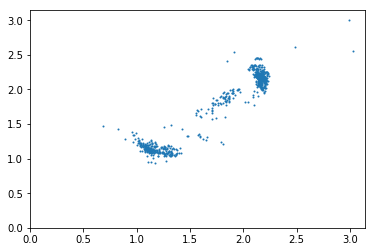

In [628]:
plt.scatter(np.matmul(X,beta),Y,s=1)
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,
         7.,  9., 19., 25., 41., 50., 50., 41., 48., 47., 35., 25.,  8.,
         2.,  3.,  6.,  5.,  5., 15., 21., 39., 35., 35., 28., 16., 19.,
        13., 12.,  4.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-1.61866119, -1.55619896, -1.49373673, -1.4312745 , -1.36881227,
        -1.30635004, -1.24388781, -1.18142558, -1.11896335, -1.05650112,
        -0.99403889, -0.93157666, -0.86911443, -0.8066522 , -0.74418997,
        -0.68172774, -0.61926551, -0.55680328, -0.49434105, -0.43187882,
        -0.36941659, -0.30695436, -0.24449213, -0.1820299 , -0.11956767,
        -0.05710544,  0.00535679,  0.06781902,  0.13028125,  0.19274348,
         0.25520571,  0.31766794,  0.38013017,  0.4425924 ,  0.50505463,
         0.56751686,  0.62997909,  0.69244132,  0.75490355,  0.81736578,
         0.87982801,  0.94229024,  1.00475247,  1.0672147 ,  1.12967693,
         1.19213916,  1.25460139,  1.31706362,  1.37952585,

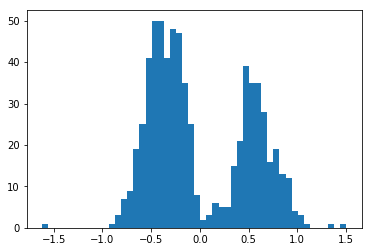

In [613]:
plt.hist(Y-np.matmul(X,beta),bins=50)

In [589]:
np.corrcoef(np.matmul(X,beta),Y)

array([[1.        , 0.61933928],
       [0.61933928, 1.        ]])

In [590]:
0.95810448**2

0.9179641945960705

In [591]:
save = outcome.iloc[data1.index,:].iloc[:,46]

In [592]:
k1 = []
for item in save.values:
    for x in item:
        if x[0][0]==1:
            k1.append(x[0][1])